# Homework 2 - Using a Decision Tree Regressor to determine who survives the Titanic Disaster

In [86]:
# Copy-pasted cell to get everything set up nicely

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

In [87]:
# import the datasets

df_train = pd.read_csv('datasets/titanic/train.csv')
df_test = pd.read_csv('datasets/titanic/test.csv')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
# some setup that will be used for all attempts

from sklearn.tree import DecisionTreeRegressor

det_reg = DecisionTreeRegressor()

# prediction target: whether they survived
y = df_train.Survived

In [89]:
# describing the training data, to get a general idea of what's all there
df_train.describe()
# this function only covers numerical entries though

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Here are a couple of observations of the data:
1. about 38% of passengers survived.
2. over half of the passengers had 3rd class tickets.
3. the average age of the passengers was about 30. The youngest was 5 months, the eldest was 80.
4. A majority of passengers came with none of their siblings or spouses. A vast majority came with none of their parents or children.
5. about 75% of the passengers paid equal or less than the average fare, which means the price of high-end tickets were far enough above the regular ticket price to skew the data. At least one passenger didn't pay; they might have been the crew.

## First Attempt: decision tree where features are sex and ticket class

In [90]:
features = ['Sex','Pclass']
X = df_train[features]

# modify the gender data of the training set to be a binary number
X['Sex'] = [1 if x == 'female' else 0 for x in X['Sex']]

det_reg.fit(X,y)

C:\Users\Gideon\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [91]:
# modify the gender data of the test set as well
df_test['Sex'] = [1 if x == 'female' else 0 for x in df_test['Sex']]

predictions = det_reg.predict(df_test[features])
predictions = np.around(predictions) # predictions give us a decimal, so we round it to make it consistent
df_test['Survived'] = predictions
df_test['Survived'] = df_test.Survived.apply(lambda x: int(x)) # convert the rounded numbers into ints

In [92]:
df_test[['PassengerId','Survived']].to_csv('datasets/titanic/class_gender_only.csv', index=False)
df_test[['PassengerId','Survived']].head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


### This attempt got a score of .75598, or about 75% correct--at the time of submission, this placed me at 8166th on the leaderboard.

## Second attempt: features are sex, ticket class, number of parents/children, whether or not they are a child, and whether or not they were crewmembers

In [93]:
# changing the training set's sex column to be a binary number for all future attempts
df_train['Sex'] = [1 if x == 'female' else 0 for x in df_train['Sex']]

# creating a new column that determines whether or not the passenger is a child
# they are a child if their age is 16 or less
df_train['Child?'] = [1 if x <= 16 else 0 for x in df_train['Age']]

df_train[868:877]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child?
868,869,0,3,"van Melkebeke, Mr. Philemon",0,NaN,0,0,345777,9.5000,NaN,S,0
869,870,1,3,"Johnson, Master. Harold Theodor",0,4.0,1,1,347742,11.1333,NaN,S,1
870,871,0,3,"Balkic, Mr. Cerin",0,26.0,0,0,349248,7.8958,NaN,S,0
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,47.0,1,1,11751,52.5542,D35,S,0
872,873,0,1,"Carlsson, Mr. Frans Olof",0,33.0,0,0,695,5.0000,B51 B53 B55,S,0
873,874,0,3,"Vander Cruyssen, Mr. Victor",0,47.0,0,0,345765,9.0000,NaN,S,0
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",1,28.0,1,0,P/PP 3381,24.0000,NaN,C,0
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",1,15.0,0,0,2667,7.2250,NaN,C,1
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",0,20.0,0,0,7534,9.8458,NaN,S,0


In [94]:
print("Everyone who paid no fare:")
print(df_train[df_train['Fare'].isin([0.0])])

print('\n' + '\n' + "Everyone with a ticket number 'LINE':")
print(df_train[df_train['Ticket'].isin(['LINE'])])

Everyone who paid no fare:
     PassengerId  Survived  Pclass                              Name  Sex  \
179          180         0       3               Leonard, Mr. Lionel    0   
263          264         0       1             Harrison, Mr. William    0   
271          272         1       3      Tornquist, Mr. William Henry    0   
277          278         0       2       Parkes, Mr. Francis "Frank"    0   
302          303         0       3   Johnson, Mr. William Cahoone Jr    0   
413          414         0       2    Cunningham, Mr. Alfred Fleming    0   
466          467         0       2             Campbell, Mr. William    0   
481          482         0       2  Frost, Mr. Anthony Wood "Archie"    0   
597          598         0       3               Johnson, Mr. Alfred    0   
633          634         0       1     Parr, Mr. William Henry Marsh    0   
674          675         0       2        Watson, Mr. Ennis Hastings    0   
732          733         0       2              K

##### It appears that ticket fare is a good way to determine who were crew members. 
I'm not sure what ticket number 'LINE' means, but all passengers with those tickets also paid no fare, so I assume it's a crew member thing.

If you look closely at the data for the people who paid no fare, you find more evidence that they were all crew; they are all male and they all embarked from the same place: Southampton, which is where the Titanic first embarked from. I'm not sure why they have different ticket classes though.

Either way, it seems this is a good indicator for whether they survived or not--out of the 15 who we assume were crewmembers in this instance, only one survived.

Now I'm curious if fare is a good indicator over all passengers

In [95]:
print(df_train[['Survived','Fare', 'Pclass']].sort_values(by='Fare'))

     Survived      Fare  Pclass
271         1    0.0000       3
597         0    0.0000       3
302         0    0.0000       3
633         0    0.0000       1
277         0    0.0000       2
413         0    0.0000       2
674         0    0.0000       2
263         0    0.0000       1
466         0    0.0000       2
732         0    0.0000       2
179         0    0.0000       3
806         0    0.0000       1
481         0    0.0000       2
822         0    0.0000       1
815         0    0.0000       1
378         0    4.0125       3
872         0    5.0000       1
326         0    6.2375       3
843         0    6.4375       3
818         0    6.4500       3
371         0    6.4958       3
202         0    6.4958       3
654         0    6.7500       3
143         0    6.7500       3
411         0    6.8583       3
825         0    6.9500       3
129         0    6.9750       3
804         1    6.9750       3
477         0    7.0458       3
611         0    7.0500       3
..      

After looking at the data, it seems to me like people who paid more were more likely to survive. This already seems to be encapsulated in ticket class, except for the people who paid no fare. Since those people were unlikely to survive, it makes sense to add that into the decision tree.

In [96]:
# a passenger is considered crew if they paid no fare
df_train['Crew?'] = [1 if x == 0.0 else 0 for x in df_train['Fare']]

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child?,Crew?
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0


In [97]:
features = ['Sex','Pclass','Parch','Child?','Crew?']
X = df_train[features]

det_reg.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [98]:
# modify the test set to add the new features
df_test['Child?'] = [1 if x <= 16 else 0 for x in df_test['Age']]
df_test['Crew?'] = [1 if x == 0.0 else 0 for x in df_test['Fare']]

predictions = det_reg.predict(df_test[features])
predictions = np.around(predictions) # predictions give us a decimal, so we round it to make it consistent
df_test['Survived'] = predictions
df_test['Survived'] = df_test.Survived.apply(lambda x: int(x)) # convert the rounded numbers into ints

In [99]:
df_test[['PassengerId','Survived']].to_csv('datasets/titanic/attempt_2.csv', index=False)
df_test[['PassengerId','Survived']].head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


### This attempt got a score of .77033, or about 77% correct--although it doesn't seem like much of an improvement over the last attempt, I shot up to 5992nd on the leaderboard.

## After analyzing ticket class and fare I feel like I should do the same for the other features, to make sure they're worth using.

In [100]:
# Female survival rate
df_train[df_train['Sex'].isin([True])].describe()[['Survived','Sex']]

,Survived,Sex
count,314.000000,314.0
mean,0.742038,1.0
std,0.438211,0.0
min,0.000000,1.0
25%,0.000000,1.0
50%,1.000000,1.0
75%,1.000000,1.0
max,1.000000,1.0


In [101]:
# Male survival rate
df_train[df_train['Sex'].isin([False])].describe()[['Survived','Sex']]

,Survived,Sex
count,577.000000,577.0
mean,0.188908,0.0
std,0.391775,0.0
min,0.000000,0.0
25%,0.000000,0.0
50%,0.000000,0.0
75%,0.000000,0.0
max,1.000000,0.0


#### Looking at the survived column in the above tables, we can see 74% of females survived and 18% of males survived.
Therefore, the sex of the passenger is VERY indicative of whether or not they would survive. This makes a good feature.

In [102]:
# Survival rate of passengers with no parents or children aboard
df_train[df_train['Parch'].isin([0])].describe()[['Survived','Parch']]

,Survived,Parch
count,678.000000,678.0
mean,0.343658,0.0
std,0.475279,0.0
min,0.000000,0.0
25%,0.000000,0.0
50%,0.000000,0.0
75%,1.000000,0.0
max,1.000000,0.0


In [103]:
# Survival rate of passengers with one parent or child aboard
df_train[df_train['Parch'].isin([1])].describe()[['Survived','Parch']]

,Survived,Parch
count,118.000000,118.0
mean,0.550847,1.0
std,0.499529,0.0
min,0.000000,1.0
25%,0.000000,1.0
50%,1.000000,1.0
75%,1.000000,1.0
max,1.000000,1.0


In [104]:
# Survival rate of passengers with two parents or children aboard
df_train[df_train['Parch'].isin([2])].describe()[['Survived','Parch']]

,Survived,Parch
count,80.000000,80.0
mean,0.500000,2.0
std,0.503155,0.0
min,0.000000,2.0
25%,0.000000,2.0
50%,0.500000,2.0
75%,1.000000,2.0
max,1.000000,2.0


In [105]:
# Survival rate of passengers with three parents or children aboard
df_train[df_train['Parch'].isin([3])].describe()[['Survived','Parch']]

,Survived,Parch
count,5.000000,5.0
mean,0.600000,3.0
std,0.547723,0.0
min,0.000000,3.0
25%,0.000000,3.0
50%,1.000000,3.0
75%,1.000000,3.0
max,1.000000,3.0


In [106]:
# Survival rate of passengers with four parents or children aboard
df_train[df_train['Parch'].isin([4])].describe()[['Survived','Parch']]

,Survived,Parch
count,4.0,4.0
mean,0.0,4.0
std,0.0,0.0
min,0.0,4.0
25%,0.0,4.0
50%,0.0,4.0
75%,0.0,4.0
max,0.0,4.0


In [107]:
# Survival rate of passengers with five parents or children aboard
df_train[df_train['Parch'].isin([5])].describe()[['Survived','Parch']]

# The information for all passengers indicates that no passengers had 6 or more parents or children aboard

,Survived,Parch
count,5.000000,5.0
mean,0.200000,5.0
std,0.447214,0.0
min,0.000000,5.0
25%,0.000000,5.0
50%,0.000000,5.0
75%,0.000000,5.0
max,1.000000,5.0


#### Looking at the above tables, it seems that survival rate depended heavily on number of parents / children aboard
##### Survival rates (percentage of total passengers : number of parents / children : survival rate):
1.  76% : 0 : 34%
2.  13% : 1 : 55%
3.   8% : 2 : 50%
4. 0.5% : 3 : 60%
5. 0.4% : 4 :  0%
6. 0.5% : 5 : 20%

The number of parents or children aboard seems like a good indicator for survival rate, with one caveat: the survival of people with 4 parents / children will be skewed.

Here's a test: I'll make another entry that's nearly identical to the last one. The only thing that will be changed is that instead of using the raw parent/child number, there will be a new column called 'Family?' which will be true for the family sizes that were most likely to survive: 1, 2, and 3.

In [108]:
df_train['Family?'] = [0 if x == 0 or x > 3 else 1 for x in df_train['Parch']]
df_test['Family?'] = [0 if x == 0 or x > 3 else 1 for x in df_test['Parch']]

df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Child?,Crew?,Family?
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,1,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0,0,0,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,0,0,0,1


In [109]:
features = ['Sex','Pclass','Child?','Crew?','Family?']
X = df_train[features]

det_reg.fit(X,y)

predictions = det_reg.predict(df_test[features])
predictions = np.around(predictions) # predictions give us a decimal, so we round it to make it consistent
df_test['Survived'] = predictions
df_test['Survived'] = df_test.Survived.apply(lambda x: int(x)) # convert the rounded numbers into ints

df_test[['PassengerId','Survived']].to_csv('datasets/titanic/attempt_2_alt.csv', index=False)
df_test[['PassengerId','Survived']].head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


### This attempt got a score of .76555, which was marginally worse than my previous score. Using the raw Parch value as a feature is better than the alteration I made

Now I want to check to see if children really were more likely to survive. If so, what is the best age range to classify a child?

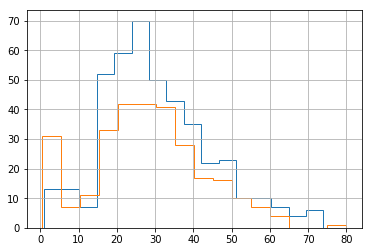

In [110]:
# Survivability of passengers based on age
df_train[df_train['Survived'].isin([False])]['Age'].hist(bins=16, histtype = 'step', stacked = True)
df_train[df_train['Survived'].isin([True])]['Age'].hist(bins=16, histtype = 'step', stacked = True)

In [111]:
df_train[df_train['Age'].isin([np.NaN])].describe()[['Survived','Age']]

,Survived,Age
count,177.000000,0.0
mean,0.293785,NaN
std,0.456787,NaN
min,0.000000,NaN
25%,0.000000,NaN
50%,0.000000,NaN
75%,1.000000,NaN
max,1.000000,NaN


#### Looking at the survival rates, it's clear age made a difference
Liklihood of survival is the difference between the number who perished (the blue line) and the number who survived (the orange line) (note that the lines aren't perfectly aligned). According to the graph, the only substantial age group with a positive survival rate (more survived than died) is very young children. Older children and teenagers are about 50/50 for survival, but this quickly changes to a very low survival rate for passengers in their early to mid twenties (blue line is far above orange line). The two lines then seem to converge as age goes up again; passengers in the age range of 30-50 are about 40% likely to survive. With the exception of one or two outliers that skew the graph, the elderly (ages 65+) have a survival rate of nearly nothing. Furthermore, passengers without a recorded age have a lower chance of surviving.

With this knowledge, I feel I should make a new feature that splits ages into categories based on survival and use that instead of the raw age value or the 'Child?' feature.

In [112]:
for x in range(891):
    if df_train.at[x,'Age'] < 7:
        df_train.at[x, 'Age_Cat'] = 1
    elif df_train.at[x,'Age'] >= 7 and df_train.at[x,'Age'] < 16:
        df_train.at[x, 'Age_Cat'] = 2
    elif df_train.at[x,'Age'] >= 16 and df_train.at[x,'Age'] < 28:
        df_train.at[x, 'Age_Cat'] = 3
    elif df_train.at[x,'Age'] >= 28 and df_train.at[x,'Age'] < 45:
        df_train.at[x, 'Age_Cat'] = 4
    elif df_train.at[x,'Age'] >= 45 and df_train.at[x,'Age'] < 61:
        df_train.at[x, 'Age_Cat'] = 5
    elif df_train.at[x,'Age'] >= 61:
        df_train.at[x, 'Age_Cat'] = 6
    # passengers without listed ages
    else:
        df_train.at[x, 'Age_Cat'] = 0

for x in range(418):
    if df_test.at[x,'Age'] < 7:
        df_test.at[x, 'Age_Cat'] = 1
    elif df_test.at[x,'Age'] >= 7 and df_test.at[x,'Age'] < 16:
        df_test.at[x, 'Age_Cat'] = 2
    elif df_test.at[x,'Age'] >= 16 and df_test.at[x,'Age'] < 28:
        df_test.at[x, 'Age_Cat'] = 3
    elif df_test.at[x,'Age'] >= 28 and df_test.at[x,'Age'] < 45:
        df_test.at[x, 'Age_Cat'] = 4
    elif df_test.at[x,'Age'] >= 45 and df_test.at[x,'Age'] < 61:
        df_test.at[x, 'Age_Cat'] = 5
    elif df_test.at[x,'Age'] >= 61:
        df_test.at[x, 'Age_Cat'] = 6
    # passengers without listed ages
    else:
        df_test.at[x, 'Age_Cat'] = 0

In [113]:
features = ['Sex','Pclass','Parch','Crew?','Age_Cat']
X = df_train[features]

det_reg.fit(X,y)

predictions = det_reg.predict(df_test[features])
predictions = np.around(predictions) # predictions give us a decimal, so we round it to make it consistent
df_test['Survived'] = predictions
df_test['Survived'] = df_test.Survived.apply(lambda x: int(x)) # convert the rounded numbers into ints

df_test[['PassengerId','Survived']].to_csv('datasets/titanic/attempt_2_alt_2.csv', index=False)
df_test[['PassengerId','Survived']].head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


### This attempt also got a score of .76555
It seems my alterations aren't improving my score. I believe I am overthinking my analysis and that my categorical judgements are underfitting the data.

I'm going to try again except I'll use the raw age value this time instead of age categories.

In [114]:
# replacing NaN age values with 0 - this way the entries can still be used
df_train['Age'] = df_train['Age'].replace(np.nan, 0)
df_test['Age'] = df_test['Age'].replace(np.nan, 0)

In [115]:
features = ['Sex','Pclass','Age','Parch','Crew?']
X = df_train[features]

det_reg.fit(X,y)

predictions = det_reg.predict(df_test[features])
predictions = np.around(predictions) # predictions give us a decimal, so we round it to make it consistent
df_test['Survived'] = predictions
df_test['Survived'] = df_test.Survived.apply(lambda x: int(x)) # convert the rounded numbers into ints

df_test[['PassengerId','Survived']].to_csv('datasets/titanic/attempt_3.csv', index=False)
df_test[['PassengerId','Survived']].head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1


### This attempt also got a score of .72727. I'm not improving.
What about the raw age values and the 'Child?' category?

In [116]:
features = ['Sex','Pclass','Age','Parch','Crew?','Child?']
X = df_train[features]

det_reg.fit(X,y)

predictions = det_reg.predict(df_test[features])
predictions = np.around(predictions) # predictions give us a decimal, so we round it to make it consistent
df_test['Survived'] = predictions
df_test['Survived'] = df_test.Survived.apply(lambda x: int(x)) # convert the rounded numbers into ints

df_test[['PassengerId','Survived']].to_csv('datasets/titanic/attempt_3_alt.csv', index=False)
df_test[['PassengerId','Survived']].head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1


### .71291. Even Worse.

So far I've ignored the Sibling/Spouse count. Let's see if that is a good indicator of survivability.

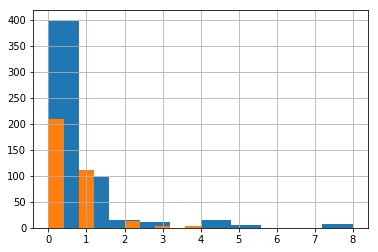

In [117]:
df_train[df_train['Survived'].isin([False])]['SibSp'].hist()
df_train[df_train['Survived'].isin([True])]['SibSp'].hist()

#### People with any number of siblings or spouses were more likely to survive than those without.

In [118]:
features = ['Sex','Pclass','SibSp','Parch','Child?','Crew?']
X = df_train[features]

det_reg.fit(X,y)

predictions = det_reg.predict(df_test[features])
predictions = np.around(predictions) # predictions give us a decimal, so we round it to make it consistent
df_test['Survived'] = predictions
df_test['Survived'] = df_test.Survived.apply(lambda x: int(x)) # convert the rounded numbers into ints

df_test[['PassengerId','Survived']].to_csv('datasets/titanic/attempt_4.csv', index=False)
df_test[['PassengerId','Survived']].head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


### This attempt also got a score of .76555 again.

How about modifying the 'Family?' feature to instead reflect whether or not they had siblings/spouses?

In [119]:
df_train['Family?'] = [0 if x == 0 else 1 for x in df_train['SibSp']]
df_test['Family?'] = [0 if x == 0 else 1 for x in df_test['SibSp']]

In [120]:
features = ['Sex','Pclass','Parch','Child?','Crew?','Family?']
X = df_train[features]

det_reg.fit(X,y)

predictions = det_reg.predict(df_test[features])
predictions = np.around(predictions) # predictions give us a decimal, so we round it to make it consistent
df_test['Survived'] = predictions
df_test['Survived'] = df_test.Survived.apply(lambda x: int(x)) # convert the rounded numbers into ints

df_test[['PassengerId','Survived']].to_csv('datasets/titanic/attempt_4_alt.csv', index=False)
df_test[['PassengerId','Survived']].head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


### This attempt also got a score of .77511, an improvement over my previous best of .77033. At the time of submission, this placed me at 5469th on the leaderboard.
Finally a better score!

What if I used the same features, but with a linear model instead?

In [121]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X,y)

predictions = lin_reg.predict(df_test[features])
predictions = np.around(predictions) # predictions give us a decimal, so we round it to make it consistent
df_test['Survived'] = predictions
df_test['Survived'] = df_test.Survived.apply(lambda x: int(x)) # convert the rounded numbers into ints

df_test[['PassengerId','Survived']].to_csv('datasets/titanic/attempt_4_lin.csv', index=False)
df_test[['PassengerId','Survived']].head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### This attempt got a score of .77990, which placed me at 4834th on the leaderboard.
Cool, I got an even better score just by using a different model!

Considering the time and effort it's taken to raise my score just a little bit I think that this is the best I'm going to be able to do before the assignment's deadline.